In [1]:
pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=38f7b65541f174f10606376f63c720109682478db0f8b8e83b682aaefa4c7dc5
  Stored in directory: c:\users\skill\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [153]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [154]:
#input
glycaemia    = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
sirolimus    = ctrl.Antecedent(np.arange(0, 21, 1), 'sirolimus')
#ouput
proteinuria = ctrl.Consequent(np.arange(150, 4000, 1), 'proteinuria')

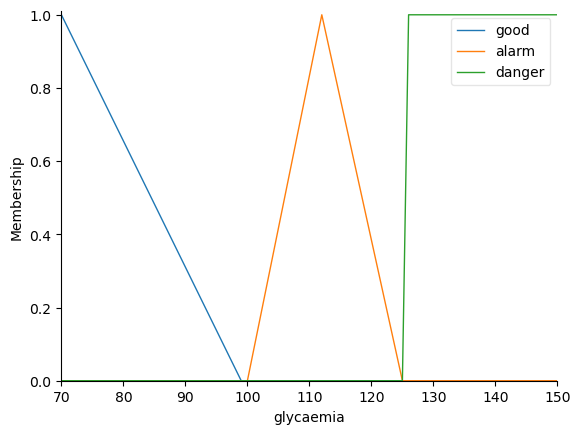

In [155]:
glycaemia['good']  = fuzz.trimf(glycaemia.universe, [70, 70, 99])
glycaemia['alarm']  = fuzz.trimf(glycaemia.universe, [100, 112, 125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe, [126, 126, 150, 150])
glycaemia.view()

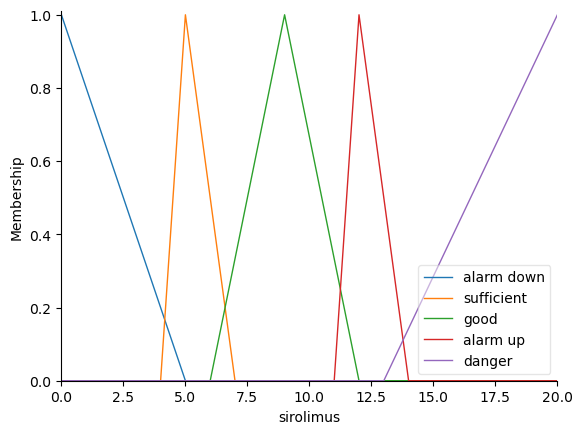

In [156]:
sirolimus['alarm down'] = fuzz.trimf(sirolimus.universe, [0, 0, 5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe, [4, 5, 7])
sirolimus['good']       = fuzz.trimf(sirolimus.universe, [6, 9, 12])
sirolimus['alarm up']   = fuzz.trimf(sirolimus.universe, [11, 12, 14])
sirolimus['danger']     = fuzz.trimf(sirolimus.universe, [13, 20, 20])
sirolimus.view()

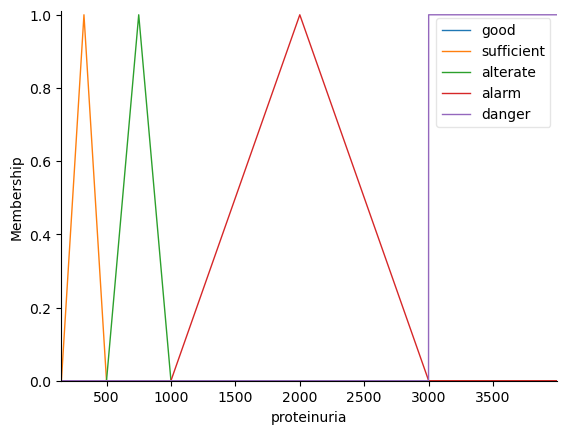

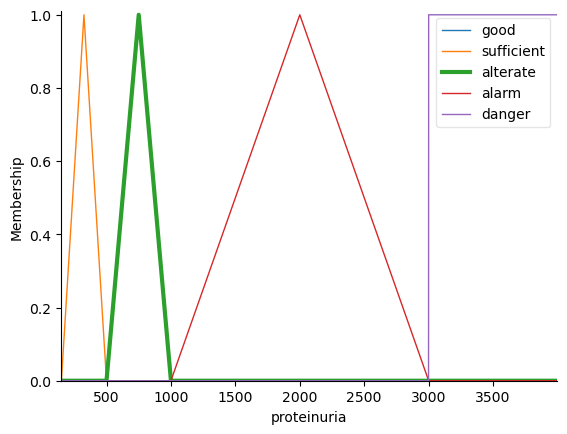

In [157]:
proteinuria['good']       = fuzz.trimf(proteinuria.universe, [0, 0, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [150, 325, 500])
proteinuria['alterate']   = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm']      = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger']     = fuzz.trapmf(proteinuria.universe, [3000, 3000, 4000, 4000])
proteinuria.view()
proteinuria['alterate'].view()

In [159]:
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'],proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'],proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'],proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm up'],proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'],proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm up'],proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'],proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm down'],proteinuria['sufficient'])

3499.0714251696218


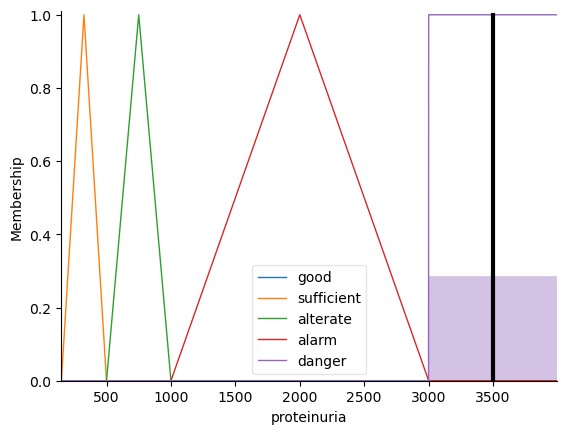

In [160]:
ProtFIS_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
#chương trình học Rule 1-8
ProtFIS = ctrl.ControlSystemSimulation(ProtFIS_ctrl)
#input
ProtFIS.input['glycaemia']=130
ProtFIS.input['sirolimus']=15

ProtFIS.compute()
print(ProtFIS.output['proteinuria'])
proteinuria.view(sim=ProtFIS)